In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
data = pd.read_csv(r'C:\Users\Bryan\Documents\Data_Science\social media bar chart practice.csv')

In [238]:
#Need to seperate out values to get a data point for each selection

data.head()

social_media
0       1,3,4,5
1     1,2,3,4,5
2  2,3,4,5,7,10
3       3,4,5,7
4       1,3,4,7

In [243]:
#First turn series into a list to make it easier to iterate

listed = list(data['social_media'])
listed[:10]

['1,3,4,5',
 '1,2,3,4,5',
 '2,3,4,5,7,10',
 '3,4,5,7',
 '1,3,4,7',
 '3,4',
 '1,2,3,4,5,6,7,10',
 '1',
 '4',
 '3,4,5']

In [263]:
#isolate each string into it's individual values
new = []
i = len(listed)
for val in range(i):
    new.append(listed[val].split(','))



[['1', '3', '4', '5'],
 ['1', '2', '3', '4', '5'],
 ['2', '3', '4', '5', '7', '10'],
 ['3', '4', '5', '7'],
 ['1', '3', '4', '7'],
 ['3', '4'],
 ['1', '2', '3', '4', '5', '6', '7', '10'],
 ['1'],
 ['4'],
 ['3', '4', '5'],
 ['1', '3', '4', '7'],
 ['1', '2', '3', '4', '5', '10'],
 ['1', '3', '4', '5', '10'],
 ['2', '3', '4', '5'],
 ['1', '5'],
 ['5', '7', '9'],
 ['3', '4'],
 ['3', '4', '5'],
 ['3', '4', '5', '7'],
 ['3', '4', '5'],
 ['3', '4'],
 ['3', '4', '5', '9'],
 ['1', '2', '3', '4', '5'],
 ['3', '5'],
 ['3'],
 ['1', '2', '3', '4', '7'],
 ['1', '2', '3', '5'],
 ['2', '3', '4', '5'],
 ['2', '3', '4', '5'],
 ['5'],
 ['1', '3', '4', '5'],
 ['3', '4', '10'],
 ['1', '3', '4', '5', '7'],
 ['1', '2', '3', '4', '5', '7'],
 ['3', '4', '5', '7', '9'],
 ['2', '3', '4', '5'],
 ['1', '2', '3', '4', '5', '9'],
 ['1', '2', '3', '4', '5', '9'],
 ['2', '3', '4'],
 ['2'],
 ['1', '2', '3', '4', '5'],
 ['2', '3', '4', '5'],
 ['1', '2', '3', '4', '6', '7'],
 ['1', '2', '3', '4', '5', '9'],
 ['4', '5', '

In [240]:
from collections import Counter

In [264]:
#Seperate each value into new list

iterable = []

for i in new:
    for val in i:
        iterable.append(str(val))
        

In [265]:
#Values are now correct, but commas need to be dropped

collections.Counter(iterable)

Counter({'1': 101,
         '3': 161,
         '4': 144,
         '5': 159,
         '2': 74,
         '7': 64,
         '10': 21,
         '6': 19,
         '9': 36})

In [266]:
new = pd.DataFrame(iterable)

In [267]:
new['nums'] = new[0]
new.dtypes

0       object
nums    object
dtype: object

In [297]:
new['values'] = new['nums'].map({'1':'facebook', '2':'twitter', '3':'instagram', '4':'snapchat', '5':'youtube', '6':'reddit', 
                 '7':'pinterest', '8':'wechat', '9':'whatsapp', '10':'tumblr'}).sort_values()
values.value_counts()



instagram    161
youtube      159
snapchat     144
facebook     101
twitter       74
pinterest     64
whatsapp      36
tumblr        21
reddit        19
Name: nums, dtype: int64

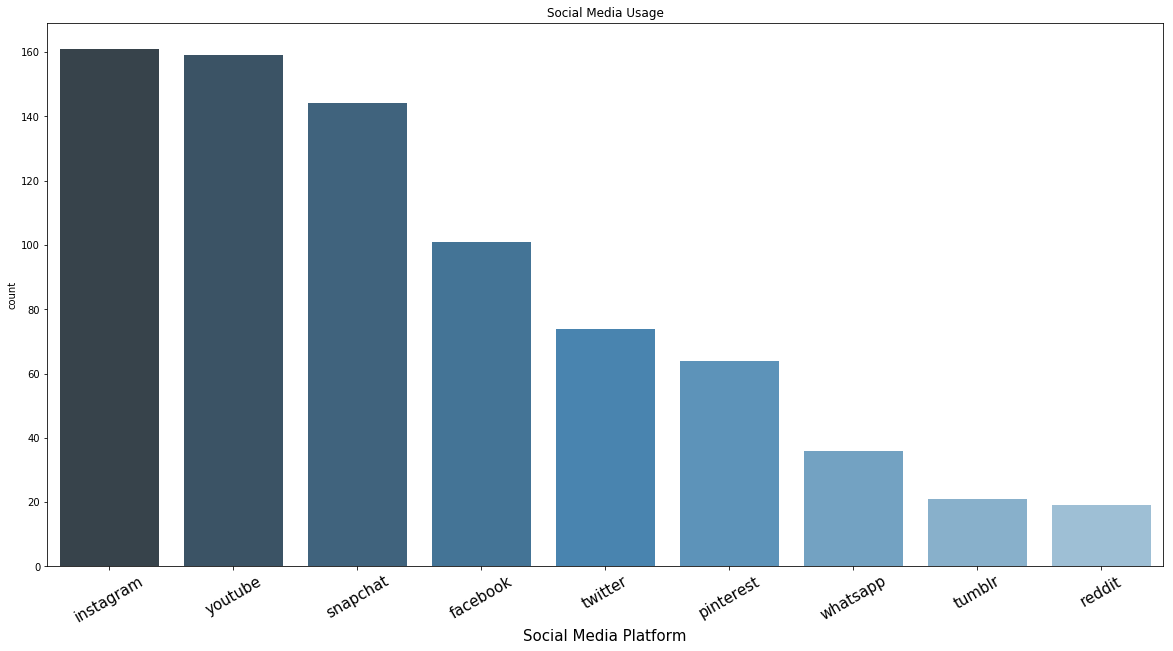

In [336]:
plt.figure(figsize = (20,10))
count = sns.countplot(x = values, data = new, palette = 'Blues_d', order = ['instagram', 'youtube', 
                                                                          'snapchat', 'facebook',
                                                                         'twitter', 'pinterest', 'whatsapp',
                                                                         'tumblr', 'reddit'])
count.set_xticklabels(count.get_xticklabels(), rotation = 30, size = 15)
count.set_xlabel('Social Media Platform', size = 15)
count.set_title('Social Media Usage')

final = count.get_figure()

In [337]:
final.savefig('social_media.png')